In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC #SVM
from sklearn.metrics import f1_score,confusion_matrix, roc_curve
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier # 딥러닝 라이브러리


import warnings
warnings.simplefilter('ignore')

In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- feature: pclass, sex, fare
- label: survived

1. 1등급, female, 32달러 인경우 생사유무를 예측하시요
( voting , bagging, boost, deep learning 을 이용하시요) 
2. 위의 모델의 train, test, f1 score 를 구하시요
3. confusion matrix 를 구하고 heatmap 을 그리시요.
4. roc curve 를 그리시요.


In [4]:
x_data = titanic[['pclass','sex','fare']]
y_data = titanic[['survived']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                   test_size=0.2,
                                                   stratify=y_data,
                                                   random_state=1)

ct = make_column_transformer((OneHotEncoder(), ['sex']), remainder='passthrough')

In [5]:
# Logistic (너무 오래걸려서 제외)
# model_logi = make_pipeline(ct, StandardScaler(), LogisticRegression())
# param_value_logi = {'logisticregression__C': np.linspace(0,1, 50),
#                'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
#               , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# gs_logi = GridSearchCV(model_logi, param_grid=param_value_logi,scoring='f1')

# KNN
model_knn = make_pipeline(ct, StandardScaler(), KNeighborsClassifier())
param_value_knn = {'kneighborsclassifier__n_neighbors':[1,2,3,4,5]}
gs_knn= GridSearchCV(model_knn, param_grid=param_value_knn, scoring='f1')
      
# Decision Tree
model_dt = make_pipeline(ct, StandardScaler(), DecisionTreeClassifier())
param_value_dt = {'decisiontreeclassifier__criterion':['entropy','gini']}
gs_dt = GridSearchCV(model_dt, param_grid=param_value_dt, scoring='f1')

# Naive Bayes
model_nb = make_pipeline(ct, StandardScaler(), BernoulliNB())

# SVC
model_svc = make_pipeline(ct, StandardScaler(), SVC(probability=True))
param_value_svc = {'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'svc__C': list(range(0,11)), 'svc__gamma':['scale','auto']}
gs_svc = GridSearchCV(model_svc, param_grid=param_value_svc, scoring='f1')

In [6]:
# solution
def solution(model):
    # 예측값
    print('예측값: ', model.predict(pd.DataFrame([[1,'female',32.0]],columns=['pclass','sex','fare'])))


    # f1 score
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print('train_f1: ', f1_score(y_train, y_pred_train))
    print('test_f1: ', f1_score(y_test, y_pred_test))

    # heatmap
    figure, ((ax1, ax2)) = plt. subplots(nrows=1, ncols=2)
    figure.set_size_inches(18,6)
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm_train, annot=True, cmap='Reds', ax = ax1)
    ax1.set(title='train')
    sns.heatmap(cm_test, annot=True, cmap='Reds', ax = ax2)
    ax2.set(title='test')
    plt.show()

    # ROC curve
    pred_prob = model.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr,'r--')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('FPR',fontsize=18)
    plt.xticks(fontsize=18)
    plt.ylabel('TPR',fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

### Hard Voting
- `predict_proba is not available when voting='hard'`: Hard Voting일 때, predict_proba가 안 되므로 ROC curve 못 그림.

예측값:  [1]
train_f1:  0.7531914893617021
test_f1:  0.7716535433070866


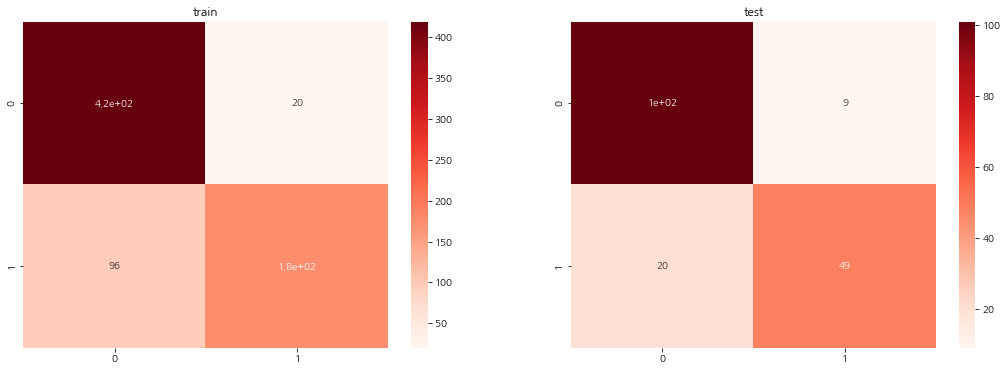

AttributeError: predict_proba is not available when voting='hard'

In [7]:
# Hard Voting
model_vote = VotingClassifier(estimators=[('knn', gs_knn),('dt', gs_dt), ('nb', model_nb), ('svc', gs_svc)],
                             voting='hard')
model_vote.fit(x_train,y_train)

solution(model_vote)

### Soft Voting

예측값:  [1]
train_f1:  0.7951807228915663
test_f1:  0.7727272727272727


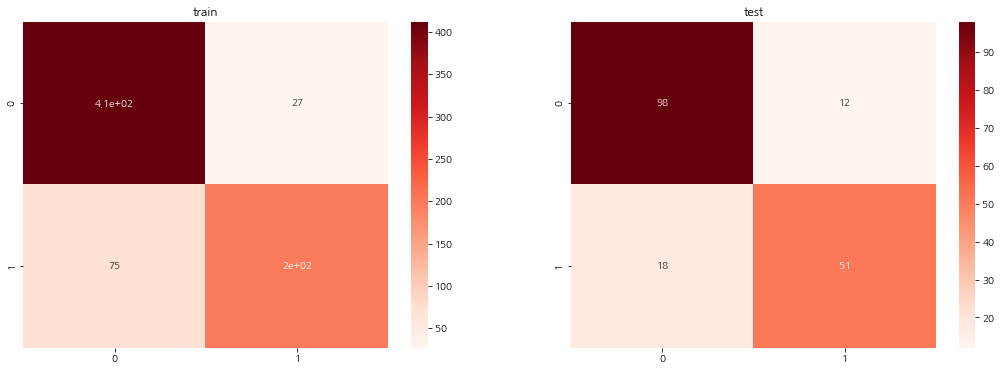

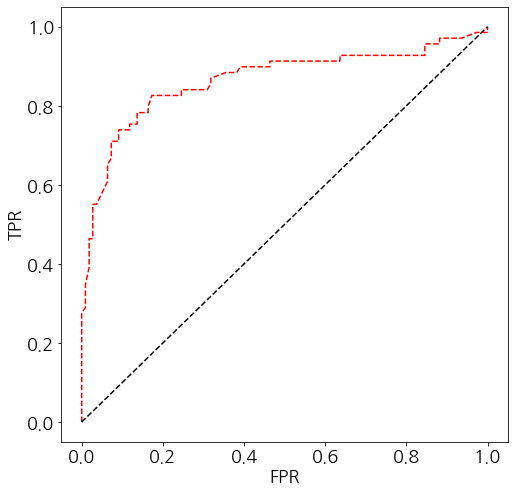

In [7]:
# Soft Voting
model_vote = VotingClassifier(estimators=[('knn', gs_knn),('dt', gs_dt), ('nb', model_nb), ('svc', gs_svc)],
                             voting='soft')
model_vote.fit(x_train,y_train)

solution(model_vote)

### Bagging: RandomForest

예측값:  [1]
train_f1:  0.8771929824561403
test_f1:  0.7727272727272727


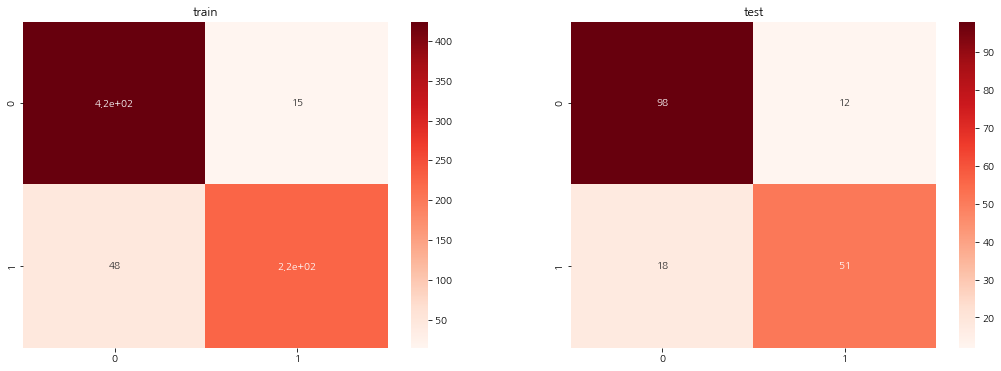

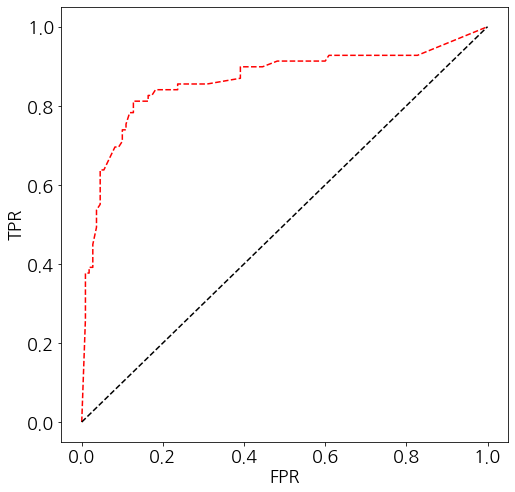

In [6]:
model_forest = make_pipeline(ct, StandardScaler(), RandomForestClassifier())
param_value_forest = {'randomforestclassifier__max_samples': np.linspace(0.1, 1.0,10)}
gs_forest = GridSearchCV(model_forest, param_grid=param_value_forest, scoring='f1')
model_forest.fit(x_train, y_train)

solution(model_forest)

### Boost: AdaBoost

[02:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
예측값:  [1]
train_f1:  0.8476562499999999
test_f1:  0.7883211678832117


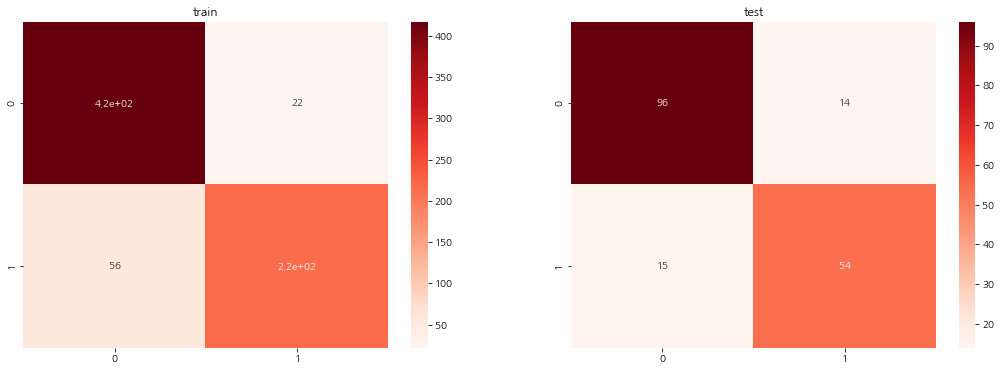

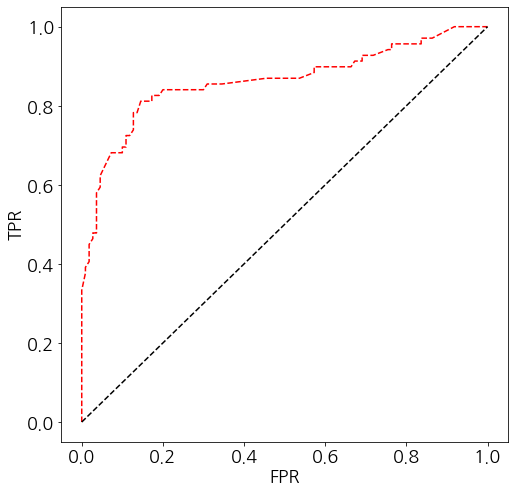

In [33]:
model_xgb = make_pipeline(ct, StandardScaler(), XGBClassifier())
model_xgb.fit(x_train,y_train)

solution(model_xgb)

### Deep learning

예측값:  [1]
train_f1:  0.7102040816326531
test_f1:  0.7559055118110236


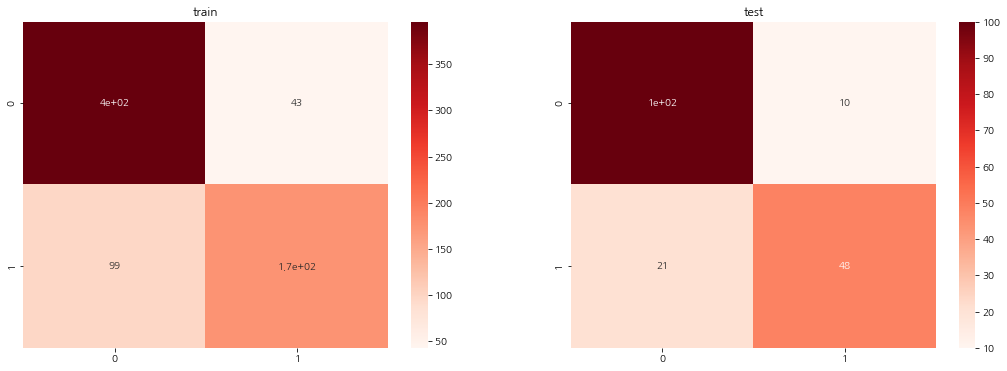

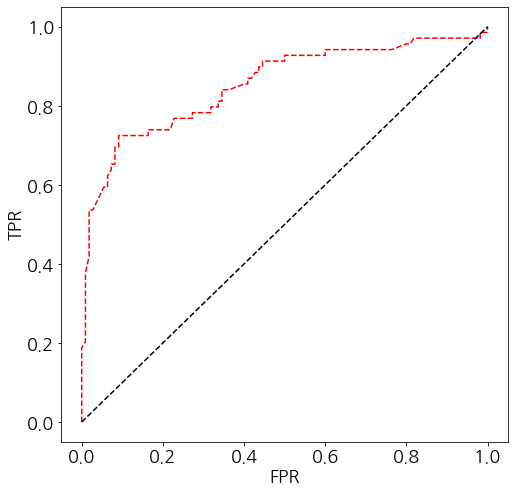

In [32]:
model_mlp = make_pipeline(ct, StandardScaler(),MLPClassifier(max_iter=1000))
model_mlp.fit(x_train,y_train)

solution(model_mlp)